In [1]:
!wget 'https://docs.google.com/uc?export=download&id=1aVzpRKsSiWt87W6DO6FrWzZ8Uie7_0KA&confirm=t' -O data.zip

--2023-03-11 05:16:52--  https://docs.google.com/uc?export=download&id=1aVzpRKsSiWt87W6DO6FrWzZ8Uie7_0KA&confirm=t
Resolving docs.google.com (docs.google.com)... 142.251.16.101, 142.251.16.138, 142.251.16.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.16.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f2nma917fkipsvgrugeh8vb24b5j6olo/1678511775000/14208162950878486530/*/1aVzpRKsSiWt87W6DO6FrWzZ8Uie7_0KA?e=download&uuid=5e1822c2-0d8d-40b4-95c8-7024a36d6721 [following]
--2023-03-11 05:16:53--  https://doc-08-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f2nma917fkipsvgrugeh8vb24b5j6olo/1678511775000/14208162950878486530/*/1aVzpRKsSiWt87W6DO6FrWzZ8Uie7_0KA?e=download&uuid=5e1822c2-0d8d-40b4-95c8-7024a36d6721
Resolving doc-08-08-docs.googleusercontent.com (doc-08-08-docs.googleusercontent.com)... 172.253.62.132, 

In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import shutil
import zipfile
import numpy as np

In [3]:
zip_file = './data.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
root_dir = '/tmp/PlantVillage'
no_classes = len(os.listdir(root_dir))
no_classes

15

In [48]:
sorted(os.listdir(root_dir))

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

Sample Potato Healthy:


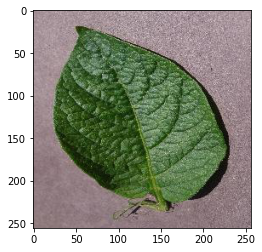

Sample Potato Late Blight: 


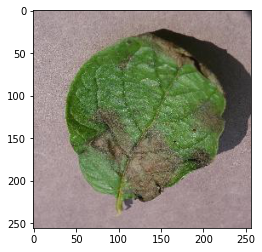

In [6]:
from tensorflow.keras.utils import  load_img

print("Sample Potato Healthy:")
healthy_potato_dir = os.path.join(root_dir, os.listdir(root_dir)[3])
plt.imshow(load_img(f"{os.path.join(healthy_potato_dir, os.listdir(healthy_potato_dir)[0])}"))
plt.show()

print("Sample Potato Late Blight: ")
late_potato_dir = os.path.join(root_dir, os.listdir(root_dir)[11])
plt.imshow(load_img(f"{os.path.join(late_potato_dir, os.listdir(late_potato_dir)[0])}"))
plt.show()

In [7]:
def train_val_dir(root_path):
  train_dir = 'train'
  valid_dir = 'valid'
  train_dir = os.path.join(root_path, train_dir)
  valid_dir = os.path.join(root_path, valid_dir)
  os.makedirs(train_dir)
  os.makedirs(valid_dir)

  return train_dir, valid_dir

In [8]:
path = '/tmp'
train_dir, valid_dir = train_val_dir(path)

In [9]:
train_dir

'/tmp/train'

In [10]:
# def split_data(root_dir):
# print(os.listdir(root_dir))
for i,ff in enumerate(os.listdir(root_dir)):
  train = os.path.join(train_dir, ff)
  valid = os.path.join(valid_dir, ff)
  os.makedirs(train)
  os.makedirs(valid)
  src = os.path.join(root_dir, ff)
  src1 = os.path.join(root_dir, ff)
  # print(train, valid, src)
  for j,f in enumerate(os.listdir(src1)):
    if 0.9 * len(os.listdir(src1)) > j:
      shutil.copyfile(os.path.join(src, f), os.path.join(train, f))
    else:
      shutil.copyfile(os.path.join(src, f), os.path.join(valid, f))

In [11]:
print("In Training:")
for f in os.listdir(train_dir):
  print(f"{f} contains: {len(os.listdir(os.path.join(train_dir, f)))}")

print()
print("In Validation:")
for f in os.listdir(valid_dir):
  print(f"{f} contains: {len(os.listdir(os.path.join(valid_dir, f)))}")

In Training:
Tomato_Leaf_Mold contains: 857
Pepper__bell___Bacterial_spot contains: 898
Potato___Early_blight contains: 900
Potato___healthy contains: 137
Tomato_healthy contains: 1432
Tomato__Tomato_YellowLeaf__Curl_Virus contains: 2889
Tomato_Spider_mites_Two_spotted_spider_mite contains: 1509
Tomato_Septoria_leaf_spot contains: 1594
Tomato_Bacterial_spot contains: 1915
Tomato__Tomato_mosaic_virus contains: 336
Tomato_Late_blight contains: 1719
Potato___Late_blight contains: 900
Pepper__bell___healthy contains: 1331
Tomato__Target_Spot contains: 1264
Tomato_Early_blight contains: 900

In Validation:
Tomato_Leaf_Mold contains: 95
Pepper__bell___Bacterial_spot contains: 99
Potato___Early_blight contains: 100
Potato___healthy contains: 15
Tomato_healthy contains: 159
Tomato__Tomato_YellowLeaf__Curl_Virus contains: 320
Tomato_Spider_mites_Two_spotted_spider_mite contains: 167
Tomato_Septoria_leaf_spot contains: 177
Tomato_Bacterial_spot contains: 212
Tomato__Tomato_mosaic_virus contains:

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1.0/255)
valid_generator = ImageDataGenerator(rescale = 1.0/255)

train_data = train_generator.flow_from_directory(directory= train_dir,
                                                 batch_size= 50,
                                                 class_mode = 'categorical',
                                                 target_size = (150,150)
                                                 )

valid_data = valid_generator.flow_from_directory(directory= valid_dir,
                                                 batch_size= 20,
                                                 class_mode = 'categorical',
                                                 target_size = (150,150)
                                                 )

Found 18580 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.


In [13]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.995):
      print(f"Reached 99.5 % accuracy so stopping training!")
      self.model.stop_training = True

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape = (150, 150, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(no_classes, activation='softmax')
])

In [15]:
model.compile(optimizer = 'Adam',
              metrics = ['accuracy'],
              loss = 'categorical_crossentropy'
              )

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [17]:
mycallback = MyCallback()

history = model.fit(
    train_data,
    epochs = 15,
    verbose = 1,
    validation_data = valid_data,
    callbacks = mycallback
)

Epoch 1/15
372/372 [==============================] - 996s 3s/step - loss: 0.9635 - accuracy: 0.6835 - val_loss: 0.4744 - val_accuracy: 0.8397
Epoch 2/15
372/372 [==============================] - 946s 3s/step - loss: 0.3480 - accuracy: 0.8823 - val_loss: 0.4143 - val_accuracy: 0.8673
Epoch 3/15
372/372 [==============================] - 911s 2s/step - loss: 0.2102 - accuracy: 0.9295 - val_loss: 0.2383 - val_accuracy: 0.9213
Epoch 4/15
372/372 [==============================] - 892s 2s/step - loss: 0.1106 - accuracy: 0.9621 - val_loss: 0.2972 - val_accuracy: 0.9038
Epoch 5/15
372/372 [==============================] - 899s 2s/step - loss: 0.1001 - accuracy: 0.9664 - val_loss: 0.2212 - val_accuracy: 0.9266
Epoch 6/15
372/372 [==============================] - 873s 2s/step - loss: 0.0564 - accuracy: 0.9810 - val_loss: 0.2384 - val_accuracy: 0.9286
Epoch 7/15
372/372 [==============================] - 887s 2s/step - loss: 0.0629 - accuracy: 0.9785 - val_loss: 0.2844 - val_accuracy: 0.9189

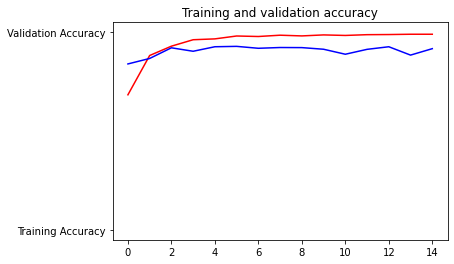

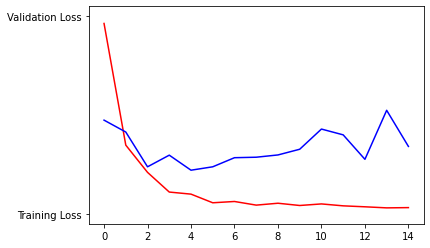

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [19]:
def download():
  import pickle
  from google.colab import files

  with open('history_augmented.pkl', 'wb') as f:
    pickle.dump(history.history, f)
  
  with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


  files.download('history_augmented.pkl')
  files.download('model.pkl')

download()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

upload = files.upload()

for f in upload.keys():
  path = '/content'
  path = os.path.join(path, f)
  img = load_img(path, target_size = (150, 150))

  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size = 10)

  highest = 0
  c = 0
  labels = sorted(os.listdir(root_dir))
  for i,fn in enumerate(labels):
    if classes[0][i] > highest:
      highest = classes[0][i]
      c = i

  print(f"{f} is a {labels[c]}")



Saving red-pepper-leaf-isolated-white-background-179280900.jpg to red-pepper-leaf-isolated-white-background-179280900.jpg
1/1 [==============================] - 0s 34ms/step
red-pepper-leaf-isolated-white-background-179280900.jpg is a Pepper__bell___healthy
